**Day - 1**

In [ ]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
!nvidia-smi

Sun Aug 27 17:50:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tensor1 = torch.tensor(7)
tensor2 = torch.tensor([1,2])
tensor3 = torch.tensor([[1,2]])
tensor4 = torch.tensor([[4,5],[6,7]])
tensor5 = torch.tensor([[[1,2],[3,4]]])

print(tensor1.ndim,tensor2.ndim,tensor3.ndim,tensor4.ndim,tensor5.ndim)
print(tensor1.shape,tensor2.shape,tensor3.shape,tensor4.shape,tensor5.shape)

0 1 2 2 3
torch.Size([]) torch.Size([2]) torch.Size([1, 2]) torch.Size([2, 2]) torch.Size([1, 2, 2])


In [ ]:
random_tensor = torch.rand((1,3,3))
print(random_tensor.ndim, random_tensor.shape)
print(random_tensor)

3 torch.Size([1, 3, 3])
tensor([[[0.6487, 0.9613, 0.7772],
         [0.9857, 0.9756, 0.8242],
         [0.6960, 0.5135, 0.3615]]])


In [ ]:
zeros = torch.zeros(3,3)
print(zeros.ndim, zeros.shape, zeros.dtype, zeros.device)
print(zeros)

ones = torch.ones(3,3)
print(ones.ndim, ones.shape, ones.dtype, ones.device, ones.requires_grad)
print(ones)

2 torch.Size([3, 3]) torch.float32 cpu
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
2 torch.Size([3, 3]) torch.float32 cpu False
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
tensor_range = torch.range(1,5,0.1)
tensor_arange = torch.arange(2,6,0.5)
print(tensor_range.ndim, tensor_range.shape)
print(tensor_range,"\n")
print(tensor_arange.ndim, tensor_arange.shape)
print(tensor_arange)

1 torch.Size([41])
tensor([1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000, 4.5000,
        4.6000, 4.7000, 4.8000, 4.9000, 5.0000]) 

1 torch.Size([8])
tensor([2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000])


<ipython-input-6-5d044ec82c3b>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  tensor_range = torch.range(1,5,0.1)


In [ ]:
tens_wo_shape = torch.zeros_like(tensor_range)
tens_wo_shape_arange = torch.ones_like(tensor_arange)
print(tensor_range.shape, tens_wo_shape.shape,"\n")
print(tensor_arange.shape, tens_wo_shape_arange.shape)

torch.Size([41]) torch.Size([41]) 

torch.Size([8]) torch.Size([8])


In [ ]:
print(f"Tensor 1 datatype is: {tensor1.dtype}")
tensor1 = tensor1.type(torch.int8)
print(f"Dtype after change is: {tensor1.dtype}")

Tensor 1 datatype is: torch.int64
Dtype after change is: torch.int8


In [ ]:
print(torch.max(tensor1))
print(torch.min(tensor1))
print(torch.mean(tensor_range))
print(torch.sum(tensor1))

tensor(7, dtype=torch.int8)
tensor(7, dtype=torch.int8)
tensor(3.)
tensor(7)


In [ ]:
print(f"Tensor range is on device: {tensor_range.device}\nAnd the type is: {type(tensor_range)}")
print(f"Now the device is: {tensor_range.to('cuda').device}")
print(f"Putting it back on cpu: {tensor_range.cpu().device}")
print(f"Converting to a numpy ndarray: {type(tensor_range.numpy())}")

Tensor range is on device: cpu
And the type is: <class 'torch.Tensor'>
Now the device is: cuda:0
Putting it back on cpu: cpu
Converting to a numpy ndarray: <class 'numpy.ndarray'>


**Day-2**

In [ ]:
import torch
import numpy as np
import pandas as pd
matmul1 = torch.ones((3,2))
matmul2 = torch.rand((3,2))

In [ ]:
print(f"When we try to multiply incompatible shapes: {matmul1 @ matmul2}")

RuntimeError: ignored

In [ ]:
print(f"When we multiply compatible shapes: {matmul1 @ matmul2.T}")

When we multiply compatible shapes: tensor([[0.5818, 0.8149, 1.1182],
        [0.5818, 0.8149, 1.1182],
        [0.5818, 0.8149, 1.1182]])


In [ ]:
random1 = torch.arange(0,100,10).type(torch.float32)
random2 = torch.arange(1,100,11).type(torch.float32)

print("For the first tensor:\n",random1.shape,random1.dtype,random1.device,random1.requires_grad)
print(f"Max: {torch.max(random1)}\nMin: {torch.min(random1)}\nMean: {torch.mean(random1)}\nSum: {torch.sum(random1)}")

print("Properties of second tensor:\n",random2.shape,random2.dtype,random2.device,random2.requires_grad)
print(f"Max: {torch.max(random2)}\nMin: {torch.min(random2)}\nMean: {torch.mean(random2)}\nSum: {torch.sum(random2)}")

For the first tensor:
 torch.Size([10]) torch.float32 cpu False
Max: 90.0
Min: 0.0
Mean: 45.0
Sum: 450.0
Properties of second tensor:
 torch.Size([9]) torch.float32 cpu False
Max: 89.0
Min: 1.0
Mean: 45.0
Sum: 405.0


In [ ]:
print(f"First tensor argmax: {torch.argmax(random1)}\nFirst tensor argmin {torch.argmin(random1)}")
print(f"Second tensor argmax: {torch.argmax(random2)}\nSecond tensor argmin: {torch.argmin(random2)}")

First tensor argmax: 9
First tensor argmin 0
Second tensor argmax: 8
Second tensor argmin: 0


In [ ]:
random3 = torch.rand(3,4).type(torch.float32)
print(random3.shape,random3.ndim)
random3_changed = random3.resize(2,6)
print(random3_changed.shape, random3.ndim)

torch.Size([3, 4]) 2
torch.Size([2, 6]) 2


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [ ]:
print(f"Using view: {random3_changed.view(3,4)}")

Using view: tensor([[0.8487, 0.5354, 0.9941, 0.3809],
        [0.9362, 0.4601, 0.9022, 0.8033],
        [0.6131, 0.8383, 0.6299, 0.0833]])


In [ ]:
random4 = torch.rand((1,4))
stacked_vert = torch.stack([random4,random4],dim=1)
print(f"Stacked vertically: {stacked_vert}\ndim: {stacked_vert.ndim}\nshape: {stacked_vert.shape}")

stacked_hori = torch.stack([random4,random4],dim=0)
print(f"Stacked vertically: {stacked_hori}\ndim: {stacked_hori.ndim}\nshape: {stacked_hori.shape}")

Stacked vertically: tensor([[[0.4505, 0.2481, 0.4784, 0.2379],
         [0.4505, 0.2481, 0.4784, 0.2379]]])
dim: 3
shape: torch.Size([1, 2, 4])
Stacked vertically: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])
dim: 3
shape: torch.Size([2, 1, 4])


In [ ]:
print(f"Squeezing stacked verticaly: {stacked_vert.squeeze().shape}")
print(f"Unsqueezing stacked horizontally: {stacked_hori.unsqueeze(dim=1).shape}")

Squeezing stacked verticaly: torch.Size([2, 4])
Unsqueezing stacked horizontally: torch.Size([2, 1, 1, 4])


In [ ]:
print(f"Original: {stacked_hori.shape}\nTensor: {stacked_hori}")
permuted = stacked_hori.permute(0,2,1)
print(f"Permuted: {permuted.shape}\nPermuted tensor: {permuted}")
print(f"Original: {stacked_hori}")

Original: torch.Size([2, 1, 4])
Tensor: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])
Permuted: torch.Size([2, 4, 1])
Permuted tensor: tensor([[[0.4505],
         [0.2481],
         [0.4784],
         [0.2379]],

        [[0.4505],
         [0.2481],
         [0.4784],
         [0.2379]]])
Original: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])


In [ ]:
np_array = np.arange(1,100,1)
print(type(np_array))
tens = torch.from_numpy(np_array).type(torch.float32)
print(type(tens))
print(tens.device)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(tens.to(device).device)
print(f"Dtype of tensor: {tens.dtype}")

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
cpu
cuda:0
Dtype of tensor: torch.float32


In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(42)
weights = 0.7
bias = 0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weights*X+bias
print(X.shape, X.dtype, X.device)
print(X)

torch.Size([50, 1]) torch.float32 cpu
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [ ]:
train_x = X[:int(0.8*len(X)),0]
train_y = y[:int(0.8*len(X)),0]

val_x = X[int(0.8*len(X)):50,0]
val_y = y[int(0.8*len(X)):50,0]
print(train_x, '\n', val_x)
print(len(train_x),len(train_y), '\n', len(val_x),len(val_y))

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800]) 
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])
40 40 
 10 10


In [ ]:
class model(nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    # self.linear1 = nn.Linear(inp, hidden1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    z = self.weights*x+self.bias
    return z

In [ ]:
linear_regressor = model()

**Day-3**

In [ ]:
layers = list(linear_regressor.children())
print(layers)

[]


In [ ]:
from tqdm.auto import tqdm
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import pandas as pd
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

def train_loop(model,train_x,train_y,n_epochs, opt,criteria):
  loss_train=[]
  loss_val=[]
  for epoch in tqdm(range(n_epochs)):
    model.train()
    opt.zero_grad()
    yhat = model(train_x)
    l = criteria(yhat,train_y)
    l.backward()
    opt.step()
    loss_train.append(l.detach().numpy().item())

    model.eval()
    with torch.inference_mode():
      y_pred = model(val_x)
      l_val = criteria(y_pred,val_y)
      loss_val.append(l_val.detach().numpy().item())
      # acc_sample = (y_pred==y).sum().item()/len(val_x)
      # acc.append(acc_sample)
  return {'training loss':loss_train, 'validation loss':loss_val}

In [ ]:
opt = torch.optim.SGD(linear_regressor.parameters(), lr=0.001)
criteria = nn.L1Loss()
train_loop(linear_regressor, train_x, train_y, 1000, opt, criteria)

  0%|          | 0/1000 [00:00<?, ?it/s]

{'training loss': [0.009368782863020897,
  0.00933497678488493,
  0.009300263598561287,
  0.009266075678169727,
  0.00923173688352108,
  0.009197162464261055,
  0.009163210168480873,
  0.009128306061029434,
  0.009094642475247383,
  0.009059777483344078,
  0.009025735780596733,
  0.008991257287561893,
  0.008956830017268658,
  0.00892273336648941,
  0.00888793170452118,
  0.008854206651449203,
  0.008819302543997765,
  0.008785403333604336,
  0.008750781416893005,
  0.008716483600437641,
  0.008682256564497948,
  0.008647588081657887,
  0.008613725192844868,
  0.008578828535974026,
  0.00854505691677332,
  0.008510304614901543,
  0.008476154878735542,
  0.008441777899861336,
  0.008407248184084892,
  0.008373253978788853,
  0.00833834894001484,
  0.008304724469780922,
  0.00826982595026493,
  0.008235814049839973,
  0.008201301097869873,
  0.008166909217834473,
  0.008132776245474815,
  0.008098003454506397,
  0.008064254187047482,
  0.00802934356033802,
  0.007995473220944405,
  0.007

In [ ]:
print(f"original weight and bias are: {weights},{bias}\nAfter training model parameters are: {linear_regressor.state_dict()}")

original weight and bias are: 0.7,0.3
After training model parameters are: OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


In [ ]:
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
  plt.figure(figsize=(10,10))
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  plt.legend(prop={"size":14})

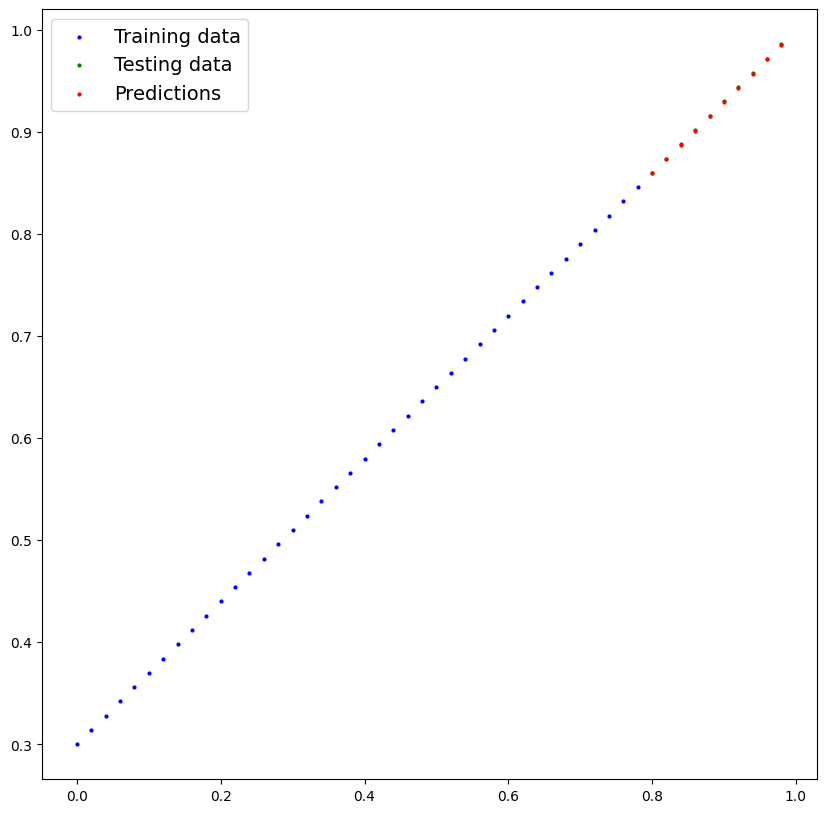

In [ ]:
predictions = linear_regressor(val_x)
plot_predictions(train_x,train_y,val_x,val_y,predictions.detach().numpy())

In [ ]:
print(linear_regressor.state_dict())
torch.save(linear_regressor.state_dict(),'model.pt')

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


In [ ]:
model_0 = model()
model_0.load_state_dict(torch.load('model.pt'))
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


**Day - 4**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_circles
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.manual_seed(42)

n_samples=1000
x,y =  make_circles(n_samples,random_state=42,noise=0.05)
print(len(x),len(y))
print(x[5:])

1000 1000
[[-0.46988549  0.70803745]
 [-0.01604538  0.80562331]
 [ 0.75962295  0.15952616]
 ...
 [-0.12823057 -0.82613318]
 [ 0.66090453 -0.79319015]
 [ 0.27841491  0.96735953]]


In [ ]:
data = pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"Y":y})
data.head(5)

,X1,X2,Y
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


<ipython-input-3-4aca0cfd2607>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=x[:,0],


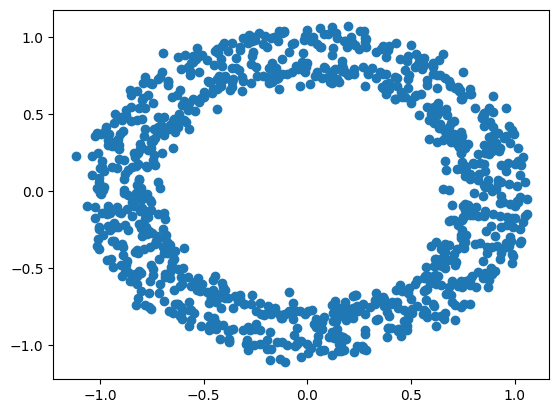

In [ ]:
plt.scatter(x=x[:,0],
            y=x[:,1],
            cmap = plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
#Converting from numpy.ndarray to torch.Tensor
x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
print(x[0:5,:],y[:5])

tensor([[ 0.7422,  0.2467],
        [-0.7340,  0.1687],
        [-0.8299,  0.2220],
        [-0.4291,  0.6722],
        [ 0.4456, -0.8949]]) tensor([1., 1., 1., 1., 0.])


In [ ]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size =0.2,random_state=42 )
print(len(train_x),len(train_y),"\n",len(val_x),len(val_y))

800 800 
 200 200


In [ ]:
import torch.nn.functional as f
import torch.nn as nn

class model_2(nn.Module):
  def __init__(self,out_shape,in_shape,hidden):
    super(model_2,self).__init__()
    self.linear1=nn.Linear(2,hidden[0])
    self.linear2 = nn.Linear(hidden[0],1)
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    # x = f.relu(self.linear1(x))
    # out = f.sigmoid(self.linear2(x))
    x = self.linear1(x)
    out = self.linear2(x)
    return out

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
import torch.nn as nn

hidden = [5]
circle_model = model_2(1,2,hidden).to(device)
criteria = nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(circle_model.parameters(),lr=0.01)

In [ ]:
next(circle_model.parameters()).device

device(type='cuda', index=0)

In [ ]:
circle_model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.1390,  0.0424],
                      [ 0.1533,  0.6014],
                      [ 0.5195, -0.3258],
                      [ 0.1094,  0.4786],
                      [ 0.3292,  0.3926]], device='cuda:0')),
             ('linear1.bias',
              tensor([-0.0015, -0.3178,  0.3793, -0.1144,  0.0016], device='cuda:0')),
             ('linear2.weight',
              tensor([[-0.2444,  0.2224,  0.3612, -0.1378, -0.3220]], device='cuda:0')),
             ('linear2.bias', tensor([-0.0146], device='cuda:0'))])

In [ ]:
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
import numpy as np

def train_loop(n_epochs,criteria,model,opt,train_x,train_y,val_x,val_y):
  # loss_train=[]
  # loss_val=[]
  acc=[]

  for epoch in tqdm(range(n_epochs)):
    train_x, train_y = train_x.to(device), train_y.to(device)
    # total_loss = 0.0
    # for x,y in zip(train_x,train_y):
    model.train()
    opt.zero_grad()
    yhat = model(train_x).squeeze()
    l = criteria(yhat,train_y)
    l.backward()
    opt.step()
    # total_loss+=l.data.item()
    # loss_train.append((total_loss/len(yhat)))

    if epoch%20==0:
      model.eval()
      val_x,val_y = val_x.to(device),val_y.to(device)
      # total_val_loss = 0.0
      # correct =0
      with torch.inference_mode():
        # for x,y in zip(val_x,val_y):
        preds = model(val_x).squeeze()
        l_val = criteria(preds,val_y)

        # total_val_loss += l_val.data.item()
        pred_label = torch.round(torch.sigmoid(preds))
        acc_epoch = ((pred_label==val_y).sum().item()/len(preds)) *100
      # loss_val.append((total_val_loss/len(pred_label))*100)
        acc.append(acc_epoch)


  # return {'Loss train':loss_train, 'Loss validation':loss_val, 'Accuracy validation':acc}
  return {'Accuracy validation':acc}

In [ ]:
n_epochs=1000
val_acc = train_loop(n_epochs,criteria,circle_model,opt,train_x,train_y,val_x,val_y)
# print(f"The first 5 epochs loss during training: {train_loss[:5]}\nValidation loss recorded every 20 epochs: {val_loss[:5]}\nAccuracy on validation set: {acc}")
print(f"Accuracy on validation set: {val_acc}")

  0%|          | 0/1000 [00:00<?, ?it/s]

Accuracy on validation set: {'Accuracy validation': [49.5, 48.0, 46.5, 47.0, 46.5, 46.0, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5]}


**Day - 5**

In [ ]:
class model_3(nn.Module):
  # def __init__(self,hidden):
  def __init__(self,):
    super(model_3,self).__init__()
    # self.layers = nn.Sequential(nn.Linear(2,hidden[0]),
    #                             torch.nn.ReLU(),
    #                             nn.Linear(hidden[0],hidden[1]),
    #                             torch.nn.ReLU(),
    #                             nn.Linear(hidden[1],1))
    self.layer1= nn.Linear(2,10)
    self.layer2 = nn.Linear(10,10)
    self.layer3 = nn.Linear(10,1)
    self.relu = nn.ReLU()
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    # return torch.round(torch.sigmoid(self.layers(x)))
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
# hidden_3 = [10,10]
circle_model_3 = model_3().to(device)

In [ ]:
next(circle_model_3.parameters()).device

device(type='cuda', index=0)

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary
print(summary(circle_model_3,input_size=(1,2),device='cuda'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]              30
              ReLU-2                [-1, 1, 10]               0
            Linear-3                [-1, 1, 10]             110
              ReLU-4                [-1, 1, 10]               0
            Linear-5                 [-1, 1, 1]              11
Total params: 151
Trainable params: 151
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [ ]:
# layer1= circle_model_3.layers[0]
# print(layer1.in_features,)

**Day - 6**

In [ ]:
# val_acc_model_3 = train_loop(n_epochs,criteria,circle_model_3,opt,train_x,train_y,val_x,val_y)
# print(f'Validation accuracy with the updated model: {val_acc_model_3}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation accuracy with the updated model: {'Accuracy validation': [51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0]}


In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
criteria_3 = nn.BCEWithLogitsLoss()
opt_3 = torch.optim.Adam(circle_model_3.parameters(), lr=0.1)
loss_train=[]
loss_vali=[]
acc_train=[]
acc_vali=[]
n_epochs=1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_x,train_y = train_x.to(device),train_y.to(device)
val_x,val_y = val_x.to(device),val_y.to(device)
for epoch in tqdm(range(n_epochs)):
  circle_model_3.train()
  logits = circle_model_3(train_x).squeeze()
  yhat = torch.round(torch.sigmoid(logits))
  loss = criteria_3(logits,train_y)
  train_acc = accuracy_score(yhat.cpu().detach().numpy(),train_y.cpu().detach().numpy())
  opt_3.zero_grad()
  loss.backward()
  opt_3.step()
  acc_train.append(train_acc)
  loss_train.append(loss)

  circle_model_3.eval()
  if epoch%100==0:
    with torch.inference_mode():
      logits_test = circle_model_3(val_x).squeeze()
      preds = torch.round(torch.sigmoid(logits_test))
      loss_val = criteria_3(logits_test,val_y)
      val_acc = accuracy_score(preds.cpu().detach().numpy(), val_y.cpu().detach().numpy())
    loss_vali.append(loss_val)
    acc_vali.append(val_acc)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(f'Training Accuracy: {acc_train}\nTraining loss: {loss_train}\nValidation accuracy: {acc_vali}\n Validation loss: {loss_vali}')

Training Accuracy: [0.5, 0.5, 0.5, 0.6375, 0.615, 0.56375, 0.5625, 0.6175, 0.75, 0.75, 0.8275, 0.90375, 0.8325, 0.87625, 0.78375, 0.9275, 0.93, 0.9225, 0.92, 0.96375, 0.955, 0.9675, 0.96375, 0.955, 0.98125, 0.9725, 0.97, 0.96375, 0.97625, 0.9725, 0.97625, 0.97375, 0.98, 0.98, 0.9775, 0.975, 0.975, 0.9825, 0.98, 0.98125, 0.97875, 0.9825, 0.985, 0.97875, 0.9775, 0.97875, 0.98625, 0.9825, 0.985, 0.9875, 0.98, 0.98375, 0.97875, 0.9825, 0.98, 0.9875, 0.98375, 0.98375, 0.985, 0.9825, 0.9825, 0.98125, 0.9875, 0.97875, 0.98, 0.9775, 0.9825, 0.985, 0.98375, 0.985, 0.98375, 0.98, 0.98, 0.98375, 0.985, 0.98625, 0.985, 0.98375, 0.98375, 0.9825, 0.98375, 0.98375, 0.9875, 0.98625, 0.9825, 0.98625, 0.98375, 0.985, 0.98375, 0.985, 0.98375, 0.9825, 0.9875, 0.98375, 0.9875, 0.98, 0.9875, 0.98375, 0.98875, 0.9825, 0.98625, 0.9875, 0.9825, 0.9875, 0.985, 0.98875, 0.985, 0.98875, 0.98625, 0.98625, 0.985, 0.98875, 0.985, 0.98875, 0.98625, 0.98875, 0.98625, 0.99125, 0.98375, 0.98, 0.97125, 0.97625, 0.9575, 0

In [ ]:
for layers in circle_model_3.children():
  print(layers)

Linear(in_features=2, out_features=10, bias=True)
Linear(in_features=10, out_features=10, bias=True)
Linear(in_features=10, out_features=1, bias=True)
ReLU()


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
%matplotlib inline

n_samples=1000
n_features=2
n_classes=4
seed=42

x,y = make_blobs(n_samples,n_features,centers=n_classes,cluster_std=1.5,
                 random_state=seed)
x,y = torch.from_numpy(x).type(torch.float32), torch.from_numpy(y).type(torch.LongTensor)
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.2,random_state=seed)

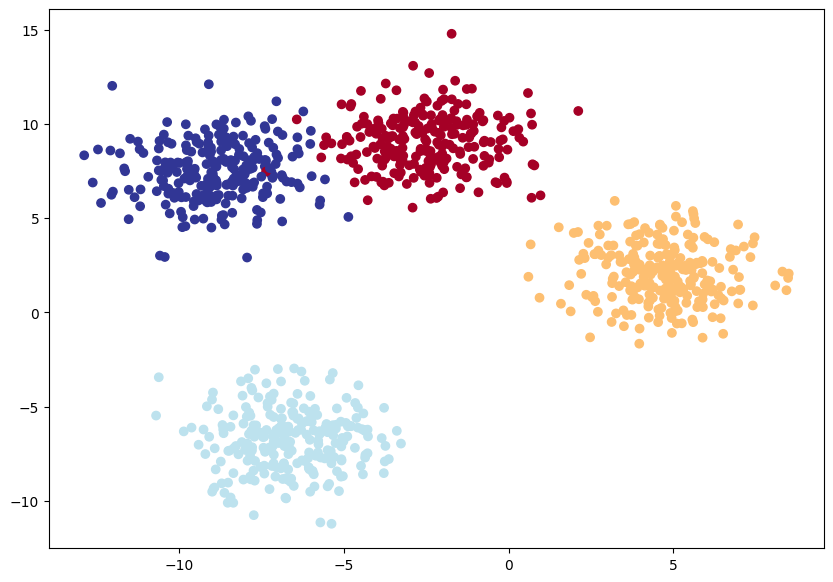

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class model_blob(nn.Module):
  def __init__(self,inp,out,hidden):
    super(model_blob,self).__init__()
    self.layer1=nn.Linear(inp,hidden[0])
    self.layer2=nn.Linear(hidden[0],hidden[1])
    self.layer3=nn.Linear(hidden[1],out)
    # self.layer4=nn.Linear(hidden[2],hidden[3])
    self.relu = nn.ReLU()
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
hidden_blob=[8,8,8]
model_4 = model_blob(inp=2,out=len(torch.unique(y)),hidden=hidden_blob).to(device)

In [ ]:
from torchsummary import summary
print(summary(model_4,input_size=(1,2),device='cuda'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 8]              72
              ReLU-4                 [-1, 1, 8]               0
            Linear-5                 [-1, 1, 4]              36
Total params: 132
Trainable params: 132
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [ ]:
for layer in model_4.children():
  print(layer)

Linear(in_features=2, out_features=8, bias=True)
Linear(in_features=8, out_features=8, bias=True)
Linear(in_features=8, out_features=4, bias=True)
ReLU()


In [ ]:
from tqdm.auto import tqdm
import torch.nn.functional as f

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

def train_loop_custom(n_epochs,opt,criteria,train_x,train_y,val_x,val_y,model):
  train_loss = []
  val_loss = []
  train_acc = []
  val_acc = []

  train_x,train_y = train_x.to(device), train_y.to(device)
  val_x, val_y = val_x.to(device), val_y.to(device)
  for epoch in tqdm(range(n_epochs)):
    model.train()
    logits = model(train_x)
    loss = criteria(logits, train_y)
    probs = f.softmax(logits, dim=1)
    yhat = torch.argmax(probs, dim=1)
    opt.zero_grad()
    loss.backward()
    opt.step()
    acc = accuracy_score(yhat.cpu().detach().numpy(), train_y.cpu().detach().numpy())
    train_loss.append(loss.data.item())
    train_acc.append(acc)

    if epoch%100==0:
      model.eval()
      with torch.inference_mode():
        logits_val = model(val_x)
        loss_val = criteria(logits_val, val_y)
        probs_val = f.softmax(logits_val,dim=1)
        preds = torch.argmax(probs_val, dim=1)
        acc_val = accuracy_score(preds.cpu().detach().numpy(),val_y.cpu().detach().numpy())
      val_loss.append(loss_val.data.item())
      val_acc.append(acc_val)

  return {'training loss': train_loss, 'training accuracy': train_acc, 'validation loss':val_loss, 'validation accuracy': val_acc}

In [ ]:
print(len(train_x), len(train_y))
print(len(val_x), len(val_y))

800 800
200 200


In [ ]:
n_epochs = 1000
criteria = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model_4.parameters(),lr=0.1)
result = train_loop_custom(n_epochs,opt,criteria,train_x,train_y,val_x,val_y,model_4)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(f"Training loss for the first 5 epochs: {result['training loss'][:5]}\nTraining accuracy: {result['training accuracy']}\nValidation loss: {result['validation loss']}\nValidation accuracy: {result['validation accuracy']}")

Training loss for the first 5 epochs: [0.012703427113592625, 3.262746810913086, 0.0657762661576271, 0.08113659918308258, 0.24255581200122833]
Training accuracy: [0.99625, 0.8125, 0.97625, 0.98375, 0.98125, 0.9725, 0.965, 0.975, 0.98875, 0.98875, 0.99, 0.99125, 0.99375, 0.99375, 0.9925, 0.99125, 0.99, 0.98875, 0.9875, 0.99125, 0.9925, 0.995, 0.99375, 0.995, 0.995, 0.995, 0.9875, 0.99, 0.995, 0.995, 0.995, 0.99375, 0.99625, 0.995, 0.995, 0.99625, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.99625, 0.995, 0.995, 0.99625, 0.99625, 0.99625, 0.995, 0.995, 0.99625, 0.995, 0.99625, 0.995, 0.995, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.995, 0.99625, 0.99625, 0.99625, 0.99625, 0.995, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.995, 0.99625, 0.99625, 0.99625, 0.99625, 0.995, 0.99625, 0.995, 0.99625, 0.99625, 0.995, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0.995, 0.99625, 0.99625, 0.99625, 0.99625, 0.99625, 0

In [ ]:
!pip install torchvision
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchmetrics
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = dset.FashionMNIST(root='data',train=True,download='True',transform=transforms.ToTensor(),target_transform=None)
test_data = dset.FashionMNIST(root='data', train=False, download=True, transform=transforms.ToTensor(), target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 11237996.09it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205131.96it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:09<00:00, 450073.98it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20902494.67it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
cti = train_data.class_to_idx
itc = {v:k for k,v in cti.items()}

In [ ]:
image, label = train_data[0]
print(image.shape)

torch.Size([1, 28, 28])


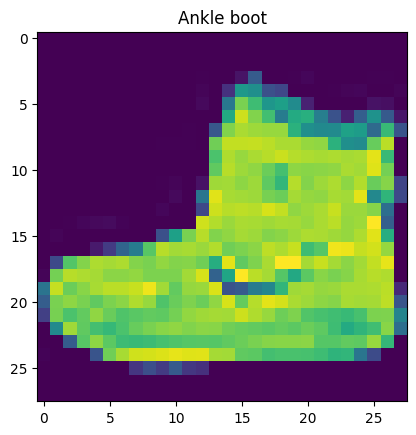

In [ ]:
# image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(itc[label])
plt.show()

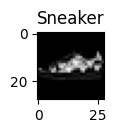

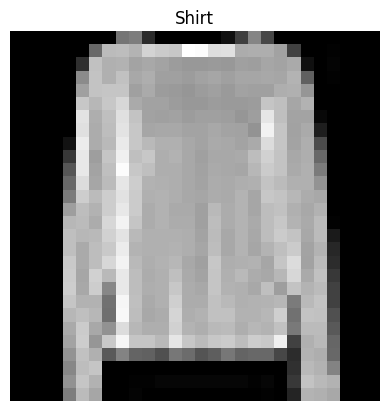

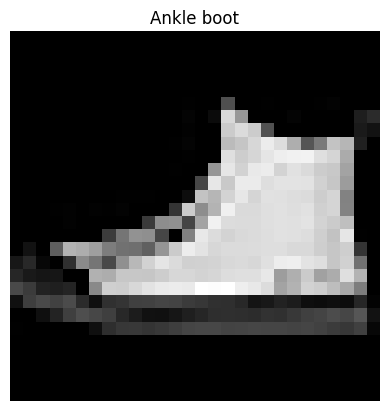

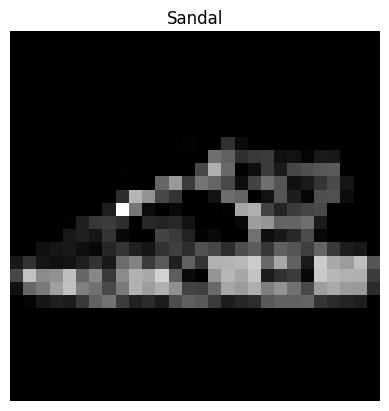

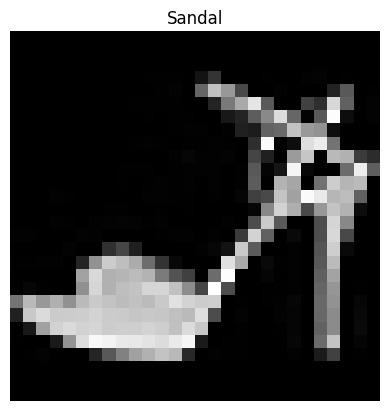

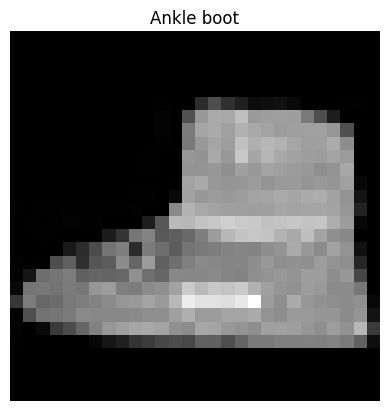

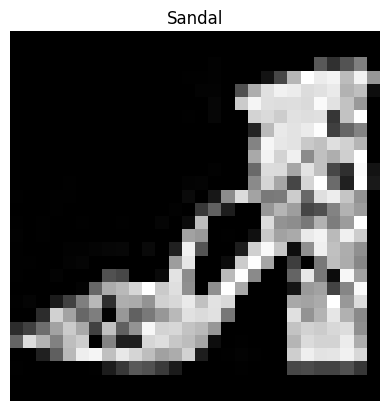

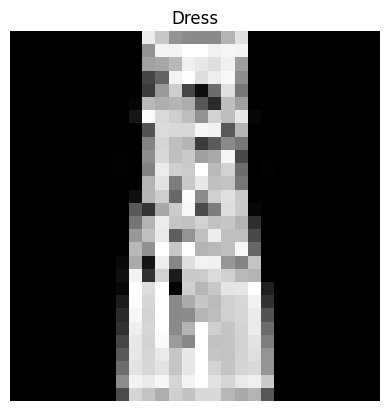

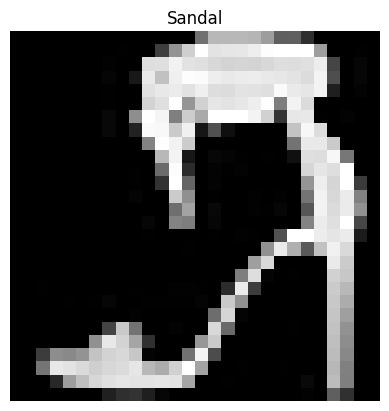

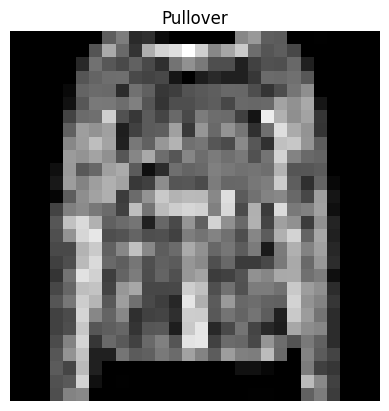

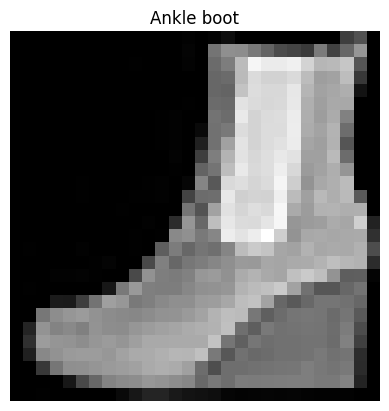

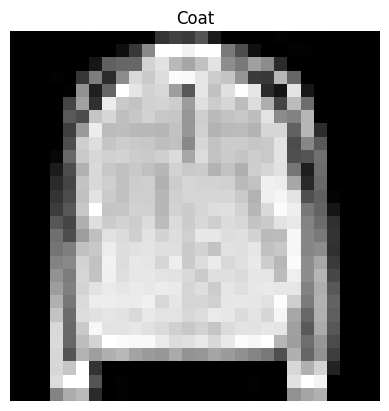

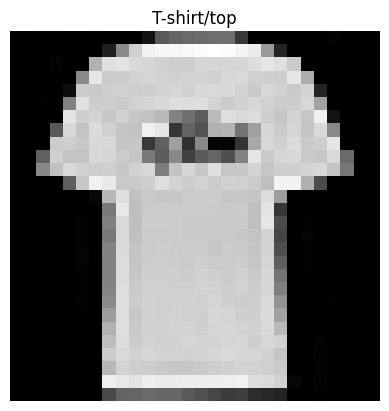

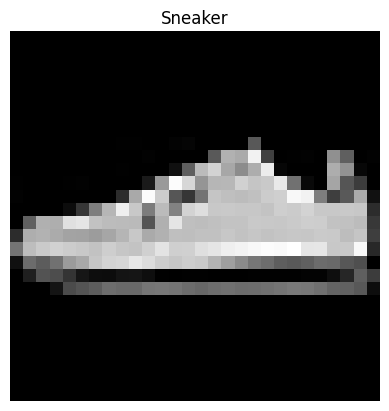

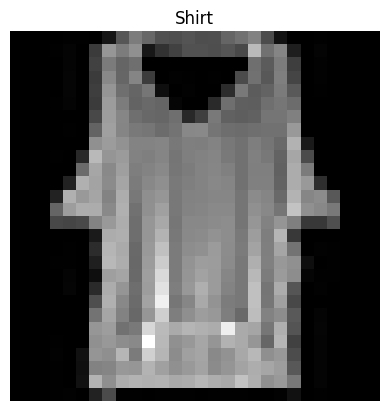

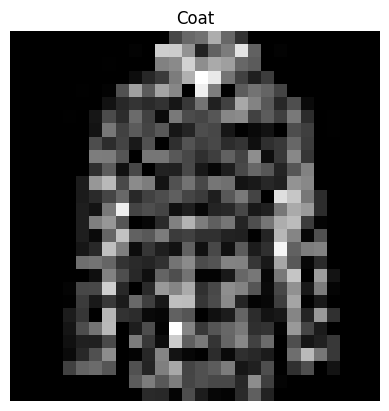

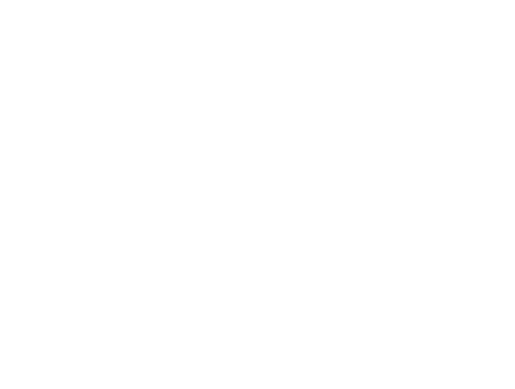

In [ ]:
fig = plt.figure(figsize=(4,4))
rows,cols=4,4

for i in range(1,rows*cols+1):
  idx = torch.randint(0,len(train_data), size=[1]).item()
  image, label = train_data[idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(itc[label])
  plt.show()
  plt.axis('off')

In [ ]:
bs = 32
train_loader = DataLoader(train_data, shuffle=True, batch_size=bs)
test_loader = DataLoader(test_data, shuffle=False, batch_size=bs)

In [ ]:
i, l = next(iter(train_loader))
# it, lt = next(iter(test_loader))

In [ ]:
i.shape, l.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

**Day - 7**

In [ ]:
classes = train_data.classes

In [ ]:
inp = 784
hidden=[10]
out=len(classes)
print(inp, hidden, out)

784 [10] 10


In [ ]:
class image_model_v0(nn.Module):
  def __init__(self, hidden, inp, out):
    super(image_model_v0, self).__init__()
    self.linear1 = nn.Linear(inp,hidden[0])
    self.linear2 = nn.Linear(hidden[0],out)
    self.flatten = nn.Flatten()
    # self.conv1 = nn.Conv2D()
    # self.conv1 = nn.Conv2D()
    # self.relu = nn.ReLU()
    # self.layer = nn.Sequential(nn.Flatten(),nn.Linear(inp,hidden[0]),nn.Linear(hidden[0],out))

  def forward(self, x:torch.Tensor)->torch.Tensor :
    return self.linear2(self.linear1(self.flatten(x)))
    # return self.layer(x)

In [ ]:
layer = nn.Sequential(nn.Flatten(),nn.Linear(inp,hidden[0]),nn.Linear(hidden[0],10))
dummy = torch.rand([1,1,28,28])
print(layer(dummy).shape)

torch.Size([1, 10])


In [ ]:
seed=42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# imodel = image_model_v0(hidden=hidden, inp=inp, out=out).to(device)
imodel = image_model_v0(hidden=hidden, inp=inp, out=out).cpu()
for layer in imodel.children():
  print(layer)

Linear(in_features=784, out_features=10, bias=True)
Linear(in_features=10, out_features=10, bias=True)
Flatten(start_dim=1, end_dim=-1)


In [ ]:
imodel.eval()
with torch.inference_mode():
  dummy = torch.rand([1,1,28,28]).cpu()
  print(imodel(dummy))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])


In [ ]:
criteria = nn.CrossEntropyLoss()
opt = torch.optim.SGD(imodel.parameters(), lr=0.01)

In [ ]:
from timeit import default_timer as timer
def inference(start:float, end:float, device:torch.device=None):
  return f"Train time on {device}: {(end-start):.3f} seconds"

In [ ]:
# #Testing
# device='cuda:0' if torch.cuda.is_available() else 'cpu'
# print(inference(10,20,device))

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
import torch.nn.functional as f
n_epochs = 2
def train_custom(n_epochs, model, train_loader, test_loader, criteria, opt):
  model.to(device)
  total_loss_train=[]
  accuracy_train=[]
  total_loss_val=[]
  accuracy_val=[]
  start = timer()
  for epoch in tqdm(range(n_epochs)):
    train_batch_loss=0
    for idx,(x,y) in enumerate(train_loader):
      x,y=(x.to(device)).float(),y.to(device)
      model.train()
      logits = model(x)
      yhat = torch.argmax(f.softmax(logits,dim=1), dim=1)
      acc_train = accuracy_score(yhat.cpu().detach().numpy(),y.cpu().detach().numpy())
      loss = criteria(logits, y)
      train_batch_loss += loss.data.item()
      opt.zero_grad()
      loss.backward()
      opt.step()
    total_loss_train.append(train_batch_loss/len(train_loader))
    accuracy_train.append(acc_train)

    if epoch%400==0:
      print(f'Looked at {idx+1} of {len(train_loader)} batches')

    test_loss=0
    model.eval()
    with torch.inference_mode():
      for a,b in test_loader:
        a,b=(a.to(device)).float(),b.to(device)
        logits_val = model(a)
        preds = torch.argmax(f.softmax(logits_val, dim=1), dim=1)
        val_acc_batch = accuracy_score(preds.cpu().detach().numpy(),b.cpu().detach().numpy())
        test_loss += criteria(logits_val,b).data.item()
      total_loss_val.append(test_loss/len(test_loader))
      accuracy_val.append(val_acc_batch)
  end=timer()
  print(f'Finished training on {device} in {(end-start):.3f} seconds')
  return {'train_loss':total_loss_train, 'train_acc':accuracy_train, 'val_loss':total_loss_val,'val_acc':accuracy_val}

In [ ]:
device='cpu'
results = train_custom(n_epochs, imodel, train_loader, test_loader, criteria, opt)
print(f"Training loss: {results['train_loss']}\nTraining accuracy: {results['train_acc']}\nValidation loss: {results['val_loss']}\nValidation accurcay: {results['val_acc']}")

  0%|          | 0/2 [00:00<?, ?it/s]

Looked at 1874 of 1874 batches
Finished training on cpu in 20.868 seconds
Training loss: [0.5018588611125946, 0.47604452620347343]
Training accuracy: [0.84375, 0.9375]
Validation loss: [0.5236041100737386, 0.49817806515640345]
Validation accurcay: [0.9375, 0.875]


**Day - 8**